In [ ]:
## Standard libraries
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp

from matplotlib.colors import ListedColormap, Normalize, BoundaryNorm
plt.rcParams.update({'font.size': 14})
import random
import math


## PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms


from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib import colormaps
from matplotlib.collections import LineCollection
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogLocator


Mounted at /content/gdrive
Device: cpu


In [ ]:
def fit_and_plot_powerlaw(x, y, ax=None, plot_kwargs=None, fit_kwargs=None):
    x = np.asarray(x)
    y = np.asarray(y)
    # 1) do the linear fit in log–log
    logx = np.log(x)
    logy = np.log(y)
    # gamma is slope, log(k) is intercept
    gamma, logk = np.polyfit(logx, logy, 1)
    k = np.exp(logk)

    # 2) plotting
    if ax is None:
        ax = plt.gca()
    if plot_kwargs is None:
        plot_kwargs = {}
    if fit_kwargs is None:
        fit_kwargs = {"linestyle":"--", "linewidth":2}

    # raw data
    ax.plot(x, y, label="data", **plot_kwargs)
    # fitted power-law
    ax.plot(x, k * x**gamma, label=f"fit", **fit_kwargs)

    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("P", fontsize=14)
    ax.set_ylabel(r"$\lambda^*$", fontsize=14)
    ax.legend()

    return k, gamma


# FInal graphs

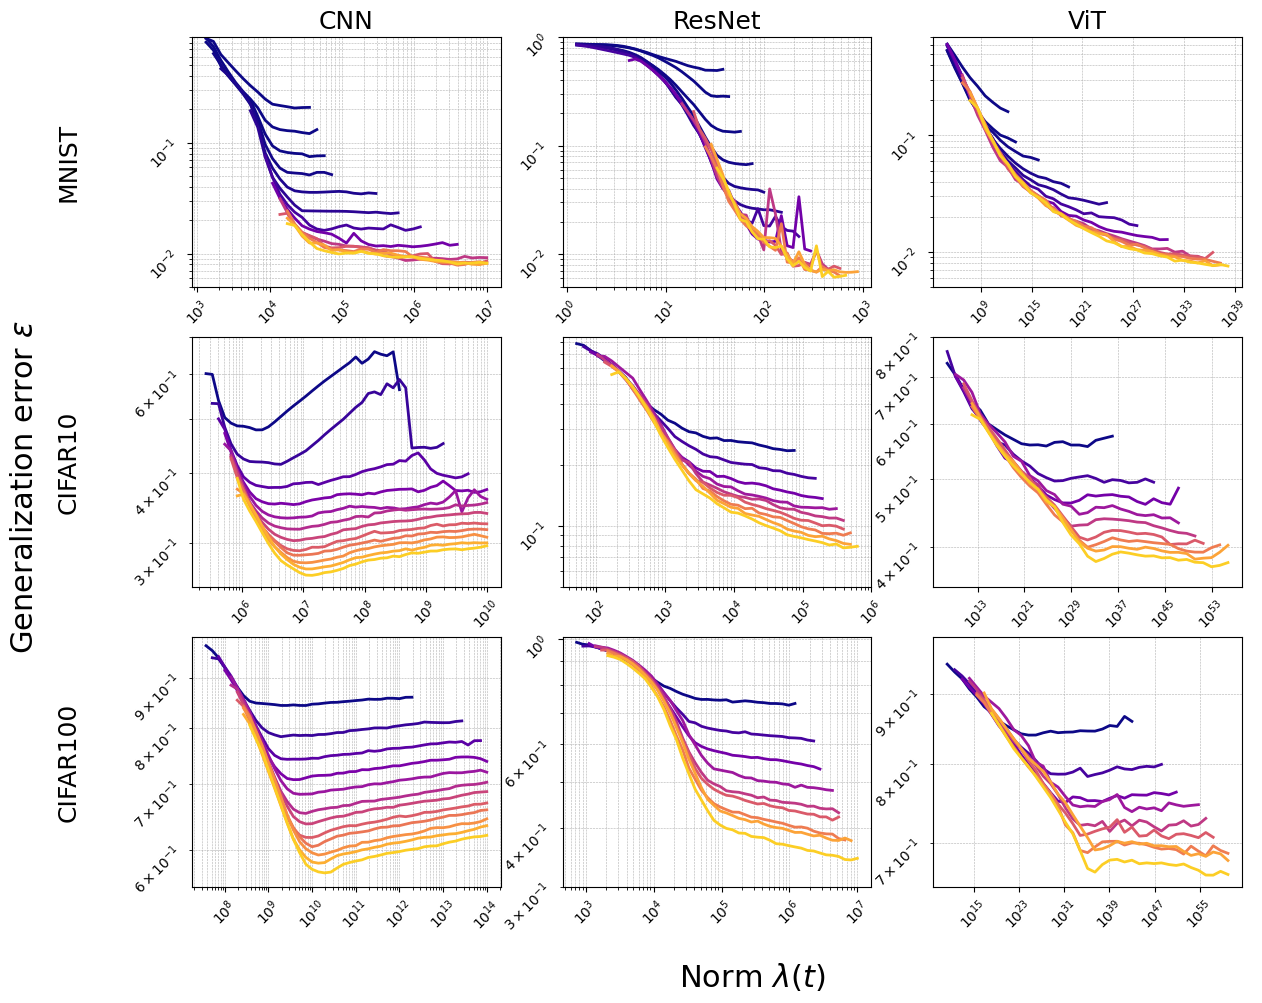

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Filenames, datasets, models, y-limits, and P arrays per dataset
name_save = [
    "CNN_MNIST.npy", "ResNet_MNIST.npy", "ViT_MNIST.npy",
    "CNN_CIFAR10.npy", "ResNet_CIFAR10.npy", "ViT_CIFAR10.npy",
    "CNN_CIFAR100.npy", "ResNet_CIFAR100.npy", "ViT_CIFAR100.npy"
]
dataset_list = ["MNIST", "CIFAR10", "CIFAR100"]
model_list = ["CNN", "ResNet", "ViT"]
ylim_values = [
    (5e-3, 9e-1), (5e-3, 10e-1), (5e-3, 7e-1),
    (2.5e-1, 0.7), (5.e-2, 0.85), (3.5e-1, 0.8),
    (5.5e-1, 9.9e-1), (3e-1, 10.1e-1), (6.5e-1, 9.9e-1)
]


# Generate visually distinct colors using a qualitative colormap
def truncate_colormap(cmap_in, minval=0.0, maxval=0.9, n=256):
    new_cmap = LinearSegmentedColormap.from_list(
        f'trunc({cmap_in.name},{minval:.2f},{maxval:.2f})',
        cmap_in(np.linspace(minval, maxval, n))
    )
    return new_cmap

base_cmap = colormaps['plasma']
cmap = truncate_colormap(base_cmap, 0.0, 0.9)


# Create 3x3 subplots
fig, axes = plt.subplots(3, 3, figsize=(14, 10))
fig.subplots_adjust(right=0.85, left=0.1, top=0.95, bottom=0.1)

# Precomputed legend y-positions for each row (figure fraction)
y_positions = [1 - (i + 0.5) / 3 for i in range(3)]

# Loop over rows (datasets) and columns (models)
for i, dataset in enumerate(dataset_list):
    for j, model in enumerate(model_list):
        idx = i * 3 + j
        # Load saved results
        saved = np.load(data_PATH + "graphs/analysis/" + name_save[idx], allow_pickle=True).item()
        log_x_grid = saved["log_x_grid"]
        mean_val_error_arr = saved["mean_val_error_arr"]

        P_arr = saved["P_arr"]
        norm = Normalize(vmin=min(P_arr), vmax=max(P_arr))

        ax = axes[i, j]
        # Plot each P curve
        for k in range(len(mean_val_error_arr[:,0])):
            color = cmap(norm(P_arr[k]))
            ax.plot(log_x_grid, mean_val_error_arr[k], color=color, linewidth=2)
        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.set_ylim(ylim_values[idx])
        ax.grid(True, which="both", linestyle="--", linewidth=0.4)
                # Rotate y-axis tick labels and reduce fontsize

        # Set column titles
        if i == 0:
            ax.set_title(model, fontsize=18)
        # Add row labels
        if j == 0:
            ax.text(
                -0.4, 0.5, dataset,
                va='center', ha='center', rotation='vertical',
                transform=ax.transAxes, fontsize=18
            )
        ax.tick_params(axis='y', rotation=45, labelsize=12)
        # Optionally, also reduce x-axis tick fontsize
        ax.tick_params(axis='x', labelsize=12)

    # Create a single legend for the row to the right
    #handles, labels = axes[i, 0].get_legend_handles_labels()
    # fig.legend(
    #     handles, labels,
    #     title=f"{dataset} P values",
    #     loc="center right",
    #     bbox_to_anchor=(1.02, y_positions[i]),
    #     fontsize=9,
    #     title_fontsize=10
    # )

# Shared axis labels
fig.text(0.5, 0., r"Norm $\lambda(t)$", ha='center', fontsize=22)
fig.text(-0.03, 0.5, r"Generalization error $\epsilon$", va='center', rotation='vertical', fontsize=22)

# after your plotting loops, before plt.show()
for ax in axes.flatten():
    # ensure both majors and minors get your new font & rotation
    ax.tick_params(
        axis='both',       # apply to x and y
        which='major',     # major ticks
        labelsize=10,       # smaller fontsize
        rotation=45        # rotate
    )
    ax.tick_params(
        axis='both',
        which='minor',     # also minor ticks (if you care)
        labelsize=10,
        rotation=45
    )

plt.show()


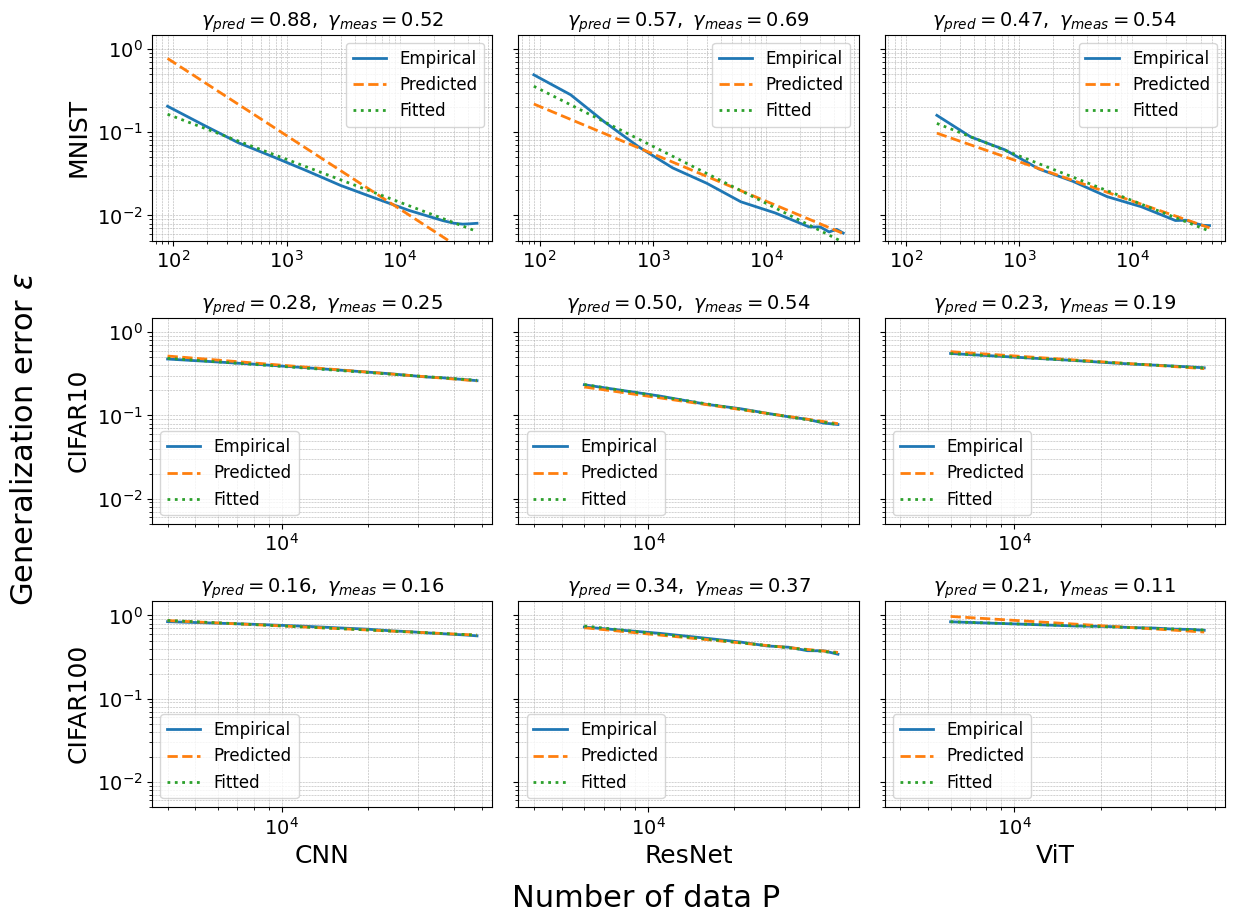

\begin{table}
\caption{Predicted vs.\ Measured Exponents}
\label{tab:error_exponents}
\begin{tabular}{llcc}
\toprule
Model & Dataset & gamma_pred & gamma_meas & stderr \\
\midrule
CNN & MNIST & 0.883 & 0.516 & 0.382 \\
ResNet & MNIST & 0.570 & 0.687 & 0.082 \\
ViT & MNIST & 0.473 & 0.538 & 0.031 \\
CNN & CIFAR10 & 0.277 & 0.245 & 0.069 \\
ResNet & CIFAR10 & 0.498 & 0.545 & 0.049 \\
ViT & CIFAR10 & 0.231 & 0.195 & 0.036 \\
CNN & CIFAR100 & 0.162 & 0.164 & 0.026 \\
ResNet & CIFAR100 & 0.335 & 0.369 & 0.052 \\
ViT & CIFAR100 & 0.212 & 0.112 & 0.076 \\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\caption{gamma_1 and gamma_2 exponents}
\label{tab:error_exponents_2}
\begin{tabular}{llcccc}
\toprule
Model & Dataset & gamma_1 & err_gamma_1 & gamma_2 & err_gamma_2 \\
\midrule
CNN & MNIST & 0.4561 & 0.0530 & 1.9358 & 0.8055 \\
ResNet & MNIST & 1.1518 & 0.1422 & 0.4951 & 0.0236 \\
ViT & MNIST & 0.1387 & 0.0057 & 3.4113 & 0.1069 \\
CNN & CIFAR10 & 0.2097 & 0.0114 & 1.3208 & 0.3226 \\
ResN

In [ ]:


# --- user parameters ---
name_save = [
    "CNN_MNIST.npy", "ResNet_MNIST.npy", "ViT_MNIST.npy",
    "CNN_CIFAR10.npy", "ResNet_CIFAR10.npy", "ViT_CIFAR10.npy",
    "CNN_CIFAR100.npy", "ResNet_CIFAR100.npy", "ViT_CIFAR100.npy"
]
dataset_list = ["MNIST", "CIFAR10", "CIFAR100"]
model_list   = ["CNN",   "ResNet",   "ViT"]
# now a mix of (xmin, xmax) or None
x_to_take = [
    None, None, None,
    None, None, None,
    None, None, None
]

col_emp, col_pred, col_fit = "C0","C1","C2"
results = []
result_gamma = []


nD, nM = len(dataset_list), len(model_list)
fig, axes = plt.subplots(nD, nM, figsize=(4*nM, 3*nD),
                        sharex="row",   # share only within each row
                        sharey=True)

for idx, fname in enumerate(name_save):
    iD, iM = divmod(idx, nM)
    ax = axes[iD, iM]

    saved = np.load(data_PATH + "graphs/analysis/" + fname, allow_pickle=True).item()
    if idx == 0:
        P_arr_0 = saved["P_arr"]
    P_arr = saved["P_arr"]
    eps    = saved["eps_lam_star_P_arr"]
    k1, k2 = saved["k1"], saved["k2"]
    γ1, γ2 = saved["gamma_1"], saved["gamma_2"]

    # build selection mask
    xt = x_to_take[idx]
    if xt is None:
        mask = np.ones_like(P_arr, dtype=bool)
    else:
        xmin, xmax = xt
        mask = (P_arr >= xmin) & (P_arr <= xmax)

    logP = np.log(P_arr[mask])
    loge = np.log(eps[mask])

    slope, intercept, _, _, stderr = linregress(logP, loge)
    fitted = np.exp(intercept) * P_arr**slope

    gamma_pred = γ1 * γ2
    gamma_meas = -slope

    err_gamma_2 = saved["err_gamma_2"]
    err_gamma_1 = saved["err_gamma_1"]

    err = γ1*γ2 * np.sqrt((err_gamma_1/γ1)**2 + (err_gamma_2/γ2)**2)
    #print(err_gamma_1/γ1, stderr)
    final_err = np.sqrt(err**2+stderr**2)

    results.append({
        "Model":        model_list[iM],
        "Dataset":      dataset_list[iD],
        "gamma_pred":   gamma_pred,
        "gamma_meas":   gamma_meas,
        "stderr":       final_err,
    })

    result_gamma.append(
        {
            "Model":        model_list[iM],
            "Dataset":      dataset_list[iD],
            "gamma_1":   γ1,
            "err_gamma_1": err_gamma_1,
            "gamma_2":   γ2,
            "err_gamma_2":       err_gamma_2,
        }
    )


    ax.plot(P_arr, eps,           label="Empirical", color=col_emp, linewidth=2)
    # find the middle index
    mid = len(P_arr) // 2

    # compute the required coefficient so that
    # coeff_new * P_arr[mid]**(-γ1*γ2) == fitted[mid]
    coeff_new = fitted[mid] / (P_arr[mid]**(-γ1*γ2))

    # now plot
    ax.plot(P_arr,
            coeff_new * (P_arr)**(-γ1*γ2),
            "--", label="Predicted", color=col_pred, linewidth=2)
    ax.plot(P_arr,
            fitted,
            ":", label="Fitted", color=col_fit, linewidth=2)

    ax.set_xscale("log"); ax.set_yscale("log")
    ax.set_ylim((5e-3,1.5))
    #ax.set_xlim((P_arr.min()-50,P_arr.max()+1000))
    ax.set_title(
        rf"$\gamma_{{pred}}={gamma_pred:.2f},\ \gamma_{{meas}}={gamma_meas:.2f}$",
        fontsize=14
    )
    ax.grid(True, which="both", linestyle="--", linewidth=0.4)
    if iM == 0:     ax.set_ylabel(dataset_list[iD], fontsize=18)

    if iD == 2:   ax.set_xlabel(model_list[iM], fontsize=18)
    ax.legend(fontsize=12)

# Shared axis labels
fig.text(0.5, -0.02, r"Number of data P", ha='center', fontsize=22)
fig.text(-0.03, 0.5, r"Generalization error $\epsilon$", va='center', rotation='vertical', fontsize=22)

#ax.tick_params(axis='x', which='both',
#                   labelbottom=True,   # override any shared‐axis hiding
#                   labelsize=8)

plt.tight_layout()
plt.show()

# --- LaTeX table ---
df = pd.DataFrame(results)
latex = df.to_latex(
    index=False,
    float_format="%.3f",
    caption="Predicted vs.\ Measured Exponents",
    label="tab:error_exponents",
    column_format="llcc",
    escape=False
)
print(latex)

df = pd.DataFrame(result_gamma)
latex = df.to_latex(
    index=False,
    float_format="%.4f",
    caption="gamma_1 and gamma_2 exponents",
    label="tab:error_exponents_2",
    column_format="llcccc",
    escape=False
)
print(latex)


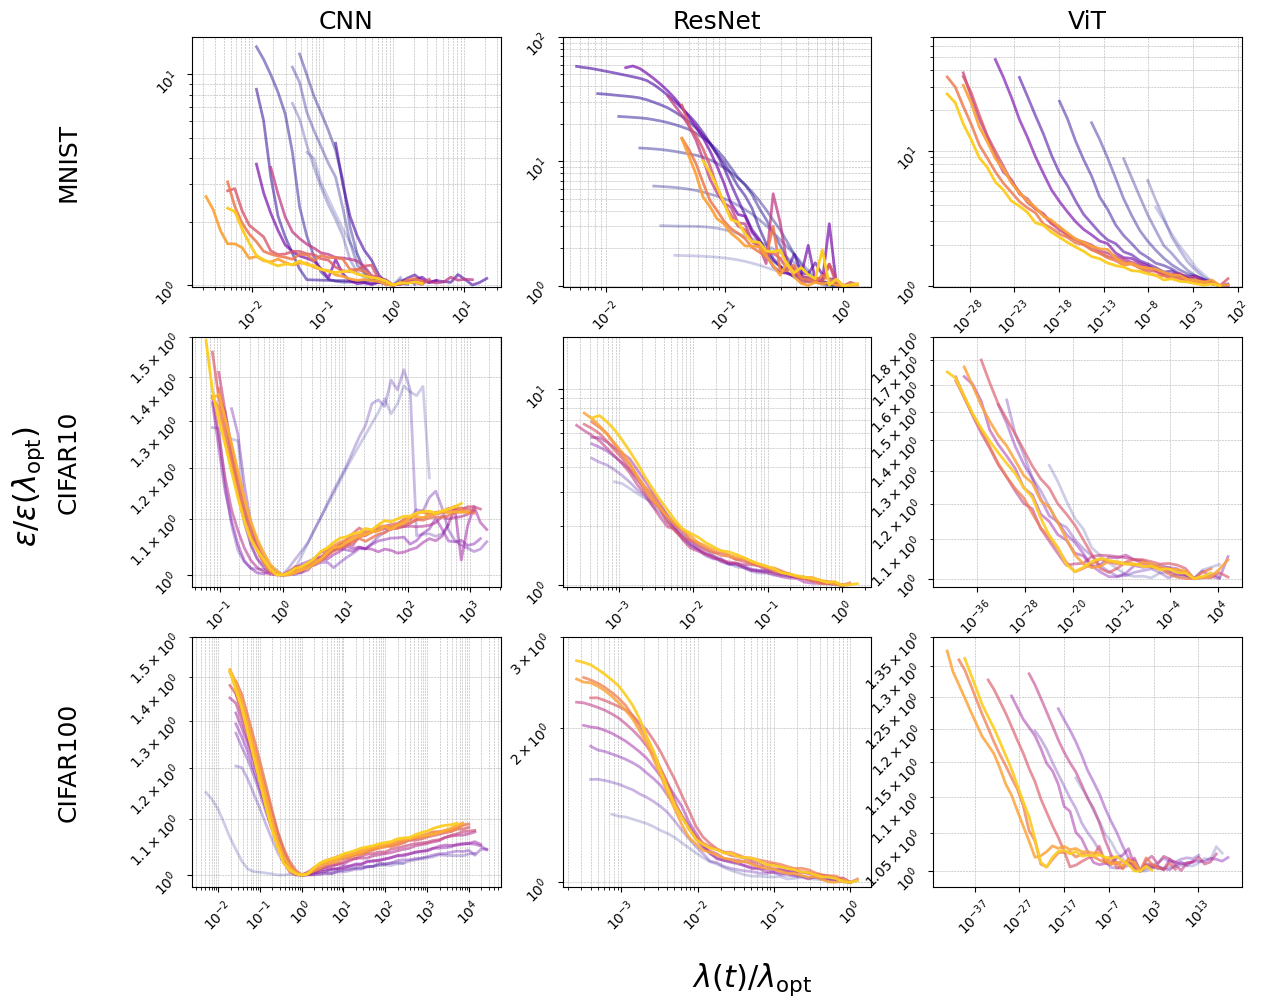

In [ ]:


# Filenames, datasets, models, y-limits, and P arrays per dataset
name_save = [
    "CNN_MNIST.npy", "ResNet_MNIST.npy", "ViT_MNIST.npy",
    "CNN_CIFAR10.npy", "ResNet_CIFAR10.npy", "ViT_CIFAR10.npy",
    "CNN_CIFAR100.npy", "ResNet_CIFAR100.npy", "ViT_CIFAR100.npy"
]
dataset_list = ["MNIST", "CIFAR10", "CIFAR100"]
model_list = ["CNN", "ResNet", "ViT"]
ylim_values = [
    (9.8e-1, 1.5e1), (9.8e-1, 10e1), (9.8e-1, 7e1),
    (9.8e-1, 1.5), (9.8e-1, 18.5), (9.8e-1, 1.8),
    (9.8e-1, 1.5e0), (9.8e-1, 3e0), (9.8e-1, 1.35e0)
]
# p_values_list = [
#     np.array([94, 188, 375, 750, 1500, 3000, 6000, 12000, 24000, 30000, 36000, 42000, 48000]),
#     np.array([12000, 16000, 20000, 24000, 28000, 32000, 36000, 40000, 44000, 48000]),
#     np.array([12000, 16000, 20000, 24000, 28000, 32000, 36000, 40000, 44000, 48000])
# ]

def truncate_colormap(cmap_in, minval=0.0, maxval=0.9, n=256):
    new_cmap = LinearSegmentedColormap.from_list(
        f'trunc({cmap_in.name},{minval:.2f},{maxval:.2f})',
        cmap_in(np.linspace(minval, maxval, n))
    )
    return new_cmap

base_cmap = colormaps['plasma']
cmap = truncate_colormap(base_cmap, 0.0, 0.9)



# Create 3x3 subplots
fig, axes = plt.subplots(3, 3, figsize=(14, 10))
fig.subplots_adjust(right=0.85, left=0.1, top=0.95, bottom=0.1)

# Precomputed legend y-positions for each row (figure fraction)
y_positions = [1 - (i + 0.5) / 3 for i in range(3)]

# Loop over rows (datasets) and columns (models)
for i, dataset in enumerate(dataset_list):
    for j, model in enumerate(model_list):
        idx = i * 3 + j
        # Load saved results
        saved = np.load(data_PATH + "graphs/analysis/" + name_save[idx], allow_pickle=True).item()
        log_x_grid = saved["log_x_grid"]
        mean_val_error_arr = saved["mean_val_error_arr"]

        P_arr = saved["P_arr"]
        norm = Normalize(vmin=min(P_arr), vmax=max(P_arr))

        ax = axes[i, j]
        # Plot each P curve
        for k in range(len(mean_val_error_arr[:,0])):
            idx_min = np.nanargmin(mean_val_error_arr[k])
            color = cmap(norm(P_arr[k]))
            ax.plot(log_x_grid/log_x_grid[idx_min], mean_val_error_arr[k]/(mean_val_error_arr[k][idx_min]), color=color, linewidth=2, alpha=((k/(len(P_arr)+2))+0.2))
        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.set_ylim(ylim_values[idx])
        ax.grid(True, which="both", linestyle="--", linewidth=0.4)
                # Rotate y-axis tick labels and reduce fontsize

        # Set column titles
        if i == 0:
            ax.set_title(model, fontsize=18)
        # Add row labels
        if j == 0:
            ax.text(
                -0.4, 0.5, dataset,
                va='center', ha='center', rotation='vertical',
                transform=ax.transAxes, fontsize=18
            )
        ax.tick_params(axis='y', rotation=45, labelsize=12)
        # Optionally, also reduce x-axis tick fontsize
        ax.tick_params(axis='x', labelsize=12)


# Shared axis labels
fig.text(0.5, 0., r"$\lambda(t)/\lambda_\mathrm{opt}$", ha='center', fontsize=22)
fig.text(-0.03, 0.5, r"$\epsilon/\epsilon(\lambda_\mathrm{opt})$", va='center', rotation='vertical', fontsize=22)

# after your plotting loops, before plt.show()
for ax in axes.flatten():
    # ensure both majors and minors get your new font & rotation
    ax.tick_params(
        axis='both',       # apply to x and y
        which='major',     # major ticks
        labelsize=10,       # smaller fontsize
        rotation=45        # rotate
    )
    ax.tick_params(
        axis='both',
        which='minor',     # also minor ticks (if you care)
        labelsize=10,
        rotation=45
    )

plt.show()